# NYC Yellow Taxi Trip Records - Análisis Exploratorio de Datos (EDA)

Este notebook contiene el análisis exploratorio del dataset de **Yellow Taxi Trip Records** de NYC para mayo 2022.

## Diccionario de Datos

- **VendorID**: A code indicating the TPEP provider that provided the record. (
1 = Creative Mobile Technologies LLC, 2 = Curb Mobility LLC, 6 = Myle Technologies Inc, 7 = Helix
)
- **tpep_pickup_datetime**: The date and time when the meter was engaged.
- **tpep_dropoff_datetime**: The date and time when the meter was disengaged. 
- **passenger_count**: The number of passengers in the vehicle. 
- **trip_distance**: The elapsed trip distance in miles reported by the taximeter.
- **RatecodeID**: The final rate code in effect at the end of the trip. (
1 = Standard rate, 2 = JFK, 3 = Newark, 4 = Nassau or Westchester, 5 = Negotiated fare, 6 = Group ride, 99 = Null/unknown
)
- **store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. (Y = store and forward trip, N = not a store and forward trip)
- **PULocationID**: TLC Taxi Zone in which the taximeter was engaged.
- **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.
- **payment_type**: A numeric code signifying how the passenger paid for the trip. (0 = Flex Fare trip, 1 = Credit card, 2 = Cash, 3 = No charge, 4 = Dispute, 5 = Unknown, 6 = Voided trip
)
- **fare_amount**: The time-and-distance fare calculated by the meter. For additional information on the following columns, see https://www.nyc.gov/site/tlc/passengers/taxi-fare.page
- **extra**: Miscellaneous extras and surcharges.
- **mta_tax**: Tax that is automatically triggered based on the metered rate in use.
- **tip_amount**: Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
- **tolls_amount**: Total amount of all tolls paid in trip.
- **improvement_surcharge**: Improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
- **total_amount**: The total amount charged to passengers. Does not include cash tips
- **congestion_surcharge**: Total amount collected in trip for NYS congestion surcharge.
- **airport_fee**: For pick up only at LaGuardia and John F. Kennedy Airports.
- **cbd_congestion_fee**: Per-trip charge for MTA's Congestion Relief Zone starting Jan. 5, 2025.

In [1]:
# Importar librerías adicionales para el EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from datetime import datetime

warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

RAW_DATA = r"..\data\raw\yellow_tripdata_2022-05.parquet"

df = pd.read_parquet(RAW_DATA)

## 1. Información General del Dataset

In [2]:
# Información básica del dataset
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")
print("\n=== TIPOS DE DATOS ===")
print(df.dtypes)
print(f"\nMemoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Verificar columnas esperadas según el diccionario de datos actualizado
expected_columns = [
    'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 
    'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
    'PULocationID', 'DOLocationID', 'payment_type',
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 
    'airport_fee', 'cbd_congestion_fee'
]

print("\n=== VERIFICACIÓN DE COLUMNAS ===")
actual_columns = set(df.columns)
expected_set = set(expected_columns)

print(f"Columnas presentes: {len(actual_columns)}")
print(f"Columnas esperadas: {len(expected_set)}")

missing_cols = expected_set - actual_columns
extra_cols = actual_columns - expected_set

if missing_cols:
    print(f"\nColumnas faltantes: {list(missing_cols)}")
if extra_cols:
    print(f"\nColumnas adicionales: {list(extra_cols)}")
if not missing_cols and not extra_cols:
    print("\n✓ Todas las columnas esperadas están presentes")

=== INFORMACIÓN GENERAL DEL DATASET ===
Forma del dataset: (3588295, 19)
Número de filas: 3,588,295
Número de columnas: 19

=== TIPOS DE DATOS ===
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

Memoria utilizada: 687.06 MB

=== VERIFICACIÓN DE COLUMNAS ===
Columnas presen

In [3]:
# Primeras y últimas filas
print("=== PRIMERAS 5 FILAS ===")
display(df.head())
print("\n=== ÚLTIMAS 5 FILAS ===")
display(df.tail())

=== PRIMERAS 5 FILAS ===


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0



=== ÚLTIMAS 5 FILAS ===


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3588290,2,2022-05-31 23:40:19,2022-06-01 00:01:20,NaN,0.00,NaN,None,36,181,0,20.97,0.0,0.5,1.00,0.0,0.3,22.77,NaN,NaN
3588291,2,2022-05-31 23:52:12,2022-06-01 00:06:40,NaN,2.91,NaN,None,144,256,0,11.68,0.0,0.0,2.51,0.0,0.3,16.99,NaN,NaN
3588292,2,2022-05-31 23:27:00,2022-05-31 23:48:00,NaN,3.96,NaN,None,161,145,0,14.54,0.0,0.5,0.00,0.0,0.3,17.84,NaN,NaN
3588293,2,2022-05-31 23:34:12,2022-06-01 00:00:13,NaN,6.27,NaN,None,145,17,0,24.01,0.0,0.5,5.54,0.0,0.3,30.35,NaN,NaN
3588294,2,2022-05-31 23:00:53,2022-05-31 23:07:54,NaN,1.43,NaN,None,238,41,0,10.05,0.0,0.5,2.21,0.0,0.3,15.56,NaN,NaN


## 2. Análisis de Valores Faltantes y Duplicados

In [4]:
# Análisis de valores faltantes
print("=== VALORES FALTANTES ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Porcentaje': missing_percentage.values
}).sort_values('Valores Faltantes', ascending=False)

print(missing_df[missing_df['Valores Faltantes'] > 0])

# Duplicados
print(f"\n=== DUPLICADOS ===")
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates:,}")
print(f"Porcentaje de duplicados: {(duplicates/len(df)*100):.2f}%")

=== VALORES FALTANTES ===
                 Columna  Valores Faltantes  Porcentaje
6     store_and_fwd_flag             129524    3.609625
5             RatecodeID             129524    3.609625
3        passenger_count             129524    3.609625
18           airport_fee             129524    3.609625
17  congestion_surcharge             129524    3.609625

=== DUPLICADOS ===
                 Columna  Valores Faltantes  Porcentaje
6     store_and_fwd_flag             129524    3.609625
5             RatecodeID             129524    3.609625
3        passenger_count             129524    3.609625
18           airport_fee             129524    3.609625
17  congestion_surcharge             129524    3.609625

=== DUPLICADOS ===
Número de filas duplicadas: 0
Porcentaje de duplicados: 0.00%
Número de filas duplicadas: 0
Porcentaje de duplicados: 0.00%


## 3. Estadísticas Descriptivas

In [5]:
# Estadísticas descriptivas para columnas numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
display(df.describe())

# Análisis específico por tipo de campo según diccionario de datos
print("\n=== ANÁLISIS DE CAMPOS CATEGÓRICOS ===")

# VendorID - Proveedor de tecnología
if 'VendorID' in df.columns:
    print("VendorID (Proveedor de tecnología):")
    vendor_counts = df['VendorID'].value_counts().sort_index()
    print(vendor_counts)
    
    vendor_mapping = {
        1: "Creative Mobile Technologies LLC", 
        2: "Curb Mobility LLC", 
        6: "Myle Technologies Inc", 
        7: "Helix"
    }
    
    for vendor_id, count in vendor_counts.items():
        vendor_name = vendor_mapping.get(vendor_id, "Desconocido")
        print(f"  {vendor_id}: {vendor_name} - {count:,} viajes ({count/len(df)*100:.1f}%)")
    
    # Verificar valores válidos según diccionario
    valid_vendors = [1, 2, 6, 7]
    invalid_vendors = df[~df['VendorID'].isin(valid_vendors)]
    if len(invalid_vendors) > 0:
        print(f"  ⚠️ VendorIDs inválidos encontrados: {len(invalid_vendors)}")
        print(f"    Valores inválidos: {sorted(invalid_vendors['VendorID'].unique())}")

# RatecodeID - Códigos de tarifa (incluye 99 para Null/unknown)
if 'RatecodeID' in df.columns:
    print("\nRatecodeID (Código de tarifa):")
    ratecode_counts = df['RatecodeID'].value_counts().sort_index()
    print(ratecode_counts)
    
    ratecode_mapping = {
        1: "Standard rate", 2: "JFK", 3: "Newark",
        4: "Nassau or Westchester", 5: "Negotiated fare", 6: "Group ride",
        99: "Null/unknown"
    }
    
    for rate_id, count in ratecode_counts.items():
        rate_name = ratecode_mapping.get(rate_id, "Desconocido")
        print(f"  {rate_id}: {rate_name} - {count:,} viajes ({count/len(df)*100:.1f}%)")

# payment_type - Método de pago (incluye 0 para Flex Fare)
if 'payment_type' in df.columns:
    print("\npayment_type (Método de pago):")
    payment_counts = df['payment_type'].value_counts().sort_index()
    print(payment_counts)
    
    payment_mapping = {
        0: "Flex Fare trip", 1: "Credit card", 2: "Cash", 3: "No charge",
        4: "Dispute", 5: "Unknown", 6: "Voided trip"
    }
    
    for payment_id, count in payment_counts.items():
        payment_name = payment_mapping.get(payment_id, "Desconocido")
        print(f"  {payment_id}: {payment_name} - {count:,} viajes ({count/len(df)*100:.1f}%)")

# passenger_count - Número de pasajeros
if 'passenger_count' in df.columns:
    print("\npassenger_count (Número de pasajeros):")
    passenger_counts = df['passenger_count'].value_counts().sort_index()
    print(passenger_counts)
    
    # Identificar valores inusuales
    zero_passengers = (df['passenger_count'] == 0).sum()
    if zero_passengers > 0:
        print(f"  ⚠️ Viajes con 0 pasajeros: {zero_passengers:,} ({zero_passengers/len(df)*100:.2f}%)")
    
    high_passengers = (df['passenger_count'] > 6).sum()
    if high_passengers > 0:
        print(f"  ⚠️ Viajes con más de 6 pasajeros: {high_passengers:,} ({high_passengers/len(df)*100:.2f}%)")

# store_and_fwd_flag - Flag de almacenamiento y reenvío
if 'store_and_fwd_flag' in df.columns:
    print("\nstore_and_fwd_flag (Flag de store and forward):")
    flag_counts = df['store_and_fwd_flag'].value_counts()
    print(flag_counts)
    
    flag_mapping = {'Y': 'Store and forward trip', 'N': 'Not a store and forward trip'}
    for flag, count in flag_counts.items():
        flag_desc = flag_mapping.get(flag, "Desconocido")
        print(f"  {flag}: {flag_desc} - {count:,} viajes ({count/len(df)*100:.1f}%)")

=== ESTADÍSTICAS DESCRIPTIVAS ===


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.588295e+06,3588295,3588295,3.458771e+06,3.588295e+06,3.458771e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.458771e+06,3.458771e+06
mean,1.713103e+00,2022-05-16 07:50:29.219312,2022-05-16 08:08:42.275203,1.393923e+00,6.856861e+00,1.365674e+00,1.645738e+02,1.625517e+02,1.183209e+00,1.516813e+01,1.020728e+00,4.891096e-01,2.824744e+00,5.827756e-01,2.964299e-01,2.207840e+01,2.282808e+00,1.008364e-01
min,1.000000e+00,2003-01-01 00:06:06,2003-01-01 00:31:38,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-05-08 18:14:16.500000,2022-05-08 18:32:36,1.000000e+00,1.150000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-05-16 09:14:42,2022-05-16 09:33:15,1.000000e+00,1.960000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-05-23 18:03:17,2022-05-23 18:21:03.500000,1.000000e+00,3.730000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-06-01 23:55:30,2022-06-02 00:03:51,9.000000e+00,3.571927e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00
std,4.888093e-01,NaN,NaN,9.555489e-01,6.908488e+02,5.239789e+00,6.562813e+01,7.027926e+01,5.075988e-01,1.489484e+01,1.256724e+00,9.008878e-02,3.368739e+00,2.173699e+00,4.576907e-02,1.848683e+01,7.452415e-01,3.434480e-01



=== ANÁLISIS DE CAMPOS CATEGÓRICOS ===
VendorID (Proveedor de tecnología):
VendorID
1    1054130
2    2527997
5         14
6       6154
Name: count, dtype: int64
  1: Creative Mobile Technologies LLC - 1,054,130 viajes (29.4%)
  2: Curb Mobility LLC - 2,527,997 viajes (70.5%)
  5: Desconocido - 14 viajes (0.0%)
  6: Myle Technologies Inc - 6,154 viajes (0.2%)
  ⚠️ VendorIDs inválidos encontrados: 14
    Valores inválidos: [np.int64(5)]

RatecodeID (Código de tarifa):
RatecodeID
1.0     3256985
2.0      147239
3.0       11636
4.0        4626
5.0       28382
6.0          39
99.0       9864
Name: count, dtype: int64
  1.0: Standard rate - 3,256,985 viajes (90.8%)
  2.0: JFK - 147,239 viajes (4.1%)
  3.0: Newark - 11,636 viajes (0.3%)
  4.0: Nassau or Westchester - 4,626 viajes (0.1%)
  5.0: Negotiated fare - 28,382 viajes (0.8%)
  6.0: Group ride - 39 viajes (0.0%)
  99.0: Null/unknown - 9,864 viajes (0.3%)

payment_type (Método de pago):
payment_type
0     129524
1    2720127
2     7063

## 4. Análisis Temporal

In [6]:
# Usar nombres específicos de columnas según el diccionario de datos
pickup_col = 'tpep_pickup_datetime'
dropoff_col = 'tpep_dropoff_datetime'

print("=== ANÁLISIS TEMPORAL ===")
print(f"Columnas de fecha/hora: {pickup_col}, {dropoff_col}")

# Verificar y convertir tipos de datos
if pickup_col in df.columns and dropoff_col in df.columns:
    # Convertir a datetime si es necesario
    if df[pickup_col].dtype == 'object':
        df[pickup_col] = pd.to_datetime(df[pickup_col])
    if df[dropoff_col].dtype == 'object':
        df[dropoff_col] = pd.to_datetime(df[dropoff_col])
    
    print(f"\nRango de fechas en {pickup_col}:")
    print(f"  Desde: {df[pickup_col].min()}")
    print(f"  Hasta: {df[pickup_col].max()}")
    
    print(f"\nRango de fechas en {dropoff_col}:")
    print(f"  Desde: {df[dropoff_col].min()}")
    print(f"  Hasta: {df[dropoff_col].max()}")
    
    # Crear columnas de tiempo de viaje
    df['trip_duration_minutes'] = (df[dropoff_col] - df[pickup_col]).dt.total_seconds() / 60
    df['trip_duration_seconds'] = (df[dropoff_col] - df[pickup_col]).dt.total_seconds()
    
    # Extraer componentes de tiempo del pickup
    df['pickup_hour'] = df[pickup_col].dt.hour
    df['pickup_day_of_week'] = df[pickup_col].dt.dayofweek
    df['pickup_day_name'] = df[pickup_col].dt.day_name()
    df['pickup_month'] = df[pickup_col].dt.month
    df['pickup_date'] = df[pickup_col].dt.date
    
    # Estadísticas de duración
    print(f"\n=== ESTADÍSTICAS DE DURACIÓN ===")
    print(f"Duración promedio del viaje: {df['trip_duration_minutes'].mean():.2f} minutos")
    print(f"Duración mediana del viaje: {df['trip_duration_minutes'].median():.2f} minutos")
    print(f"Duración mínima: {df['trip_duration_minutes'].min():.2f} minutos")
    print(f"Duración máxima: {df['trip_duration_minutes'].max():.2f} minutos")
    
    # Identificar viajes con duración inusual
    negative_duration = (df['trip_duration_seconds'] <= 0).sum()
    if negative_duration > 0:
        print(f"\n⚠️ Viajes con duración negativa o cero: {negative_duration:,} ({negative_duration/len(df)*100:.2f}%)")
    
    very_long_trips = (df['trip_duration_minutes'] > 180).sum()  # Más de 3 horas
    if very_long_trips > 0:
        print(f"⚠️ Viajes de más de 3 horas: {very_long_trips:,} ({very_long_trips/len(df)*100:.2f}%)")
    
    very_short_trips = (df['trip_duration_seconds'] < 60).sum()  # Menos de 1 minuto
    if very_short_trips > 0:
        print(f"⚠️ Viajes de menos de 1 minuto: {very_short_trips:,} ({very_short_trips/len(df)*100:.2f}%)")
else:
    print("⚠️ No se encontraron las columnas de fecha/hora esperadas")

=== ANÁLISIS TEMPORAL ===
Columnas de fecha/hora: tpep_pickup_datetime, tpep_dropoff_datetime

Rango de fechas en tpep_pickup_datetime:
  Desde: 2003-01-01 00:06:06
  Hasta: 2022-06-01 23:55:30

Rango de fechas en tpep_dropoff_datetime:
  Desde: 2003-01-01 00:31:38
  Hasta: 2022-06-02 00:03:51

=== ESTADÍSTICAS DE DURACIÓN ===
Duración promedio del viaje: 18.22 minutos
Duración mediana del viaje: 12.70 minutos
Duración mínima: -14.08 minutos
Duración máxima: 6823.55 minutos

⚠️ Viajes con duración negativa o cero: 3,030 (0.08%)
⚠️ Viajes de más de 3 horas: 5,084 (0.14%)
⚠️ Viajes de menos de 1 minuto: 48,944 (1.36%)

=== ESTADÍSTICAS DE DURACIÓN ===
Duración promedio del viaje: 18.22 minutos
Duración mediana del viaje: 12.70 minutos
Duración mínima: -14.08 minutos
Duración máxima: 6823.55 minutos

⚠️ Viajes con duración negativa o cero: 3,030 (0.08%)
⚠️ Viajes de más de 3 horas: 5,084 (0.14%)
⚠️ Viajes de menos de 1 minuto: 48,944 (1.36%)


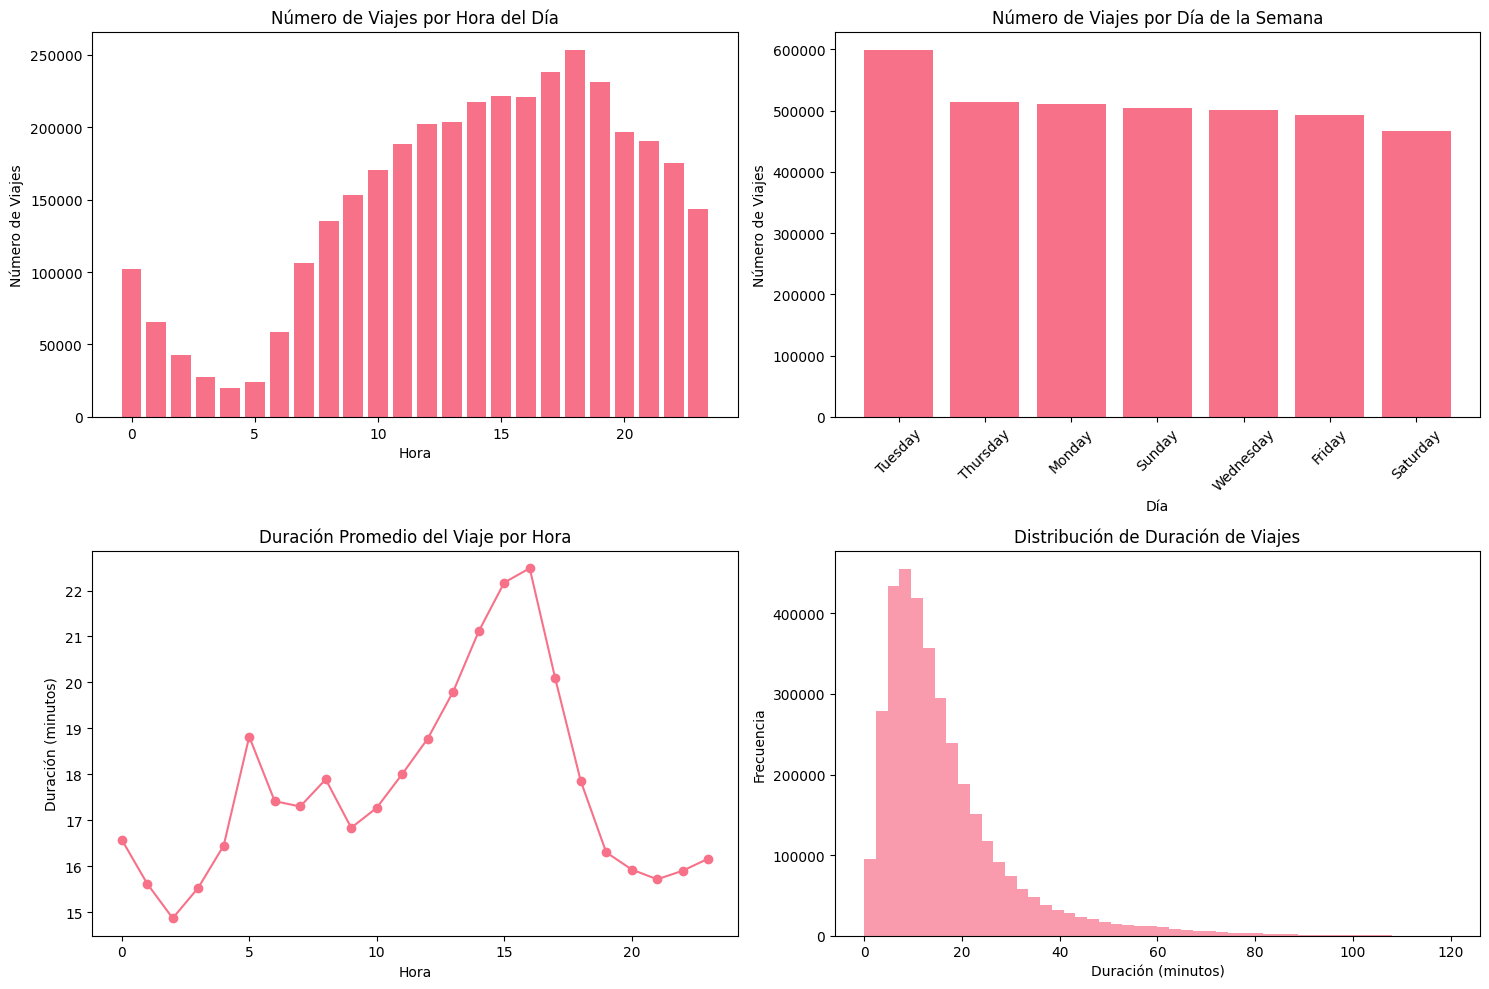

In [7]:
# Análisis de patrones temporales
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Viajes por hora del día
if 'pickup_hour' in df.columns:
    hourly_trips = df['pickup_hour'].value_counts().sort_index()
    axes[0,0].bar(hourly_trips.index, hourly_trips.values)
    axes[0,0].set_title('Número de Viajes por Hora del Día')
    axes[0,0].set_xlabel('Hora')
    axes[0,0].set_ylabel('Número de Viajes')

# Viajes por día de la semana
if 'pickup_day_name' in df.columns:
    daily_trips = df['pickup_day_name'].value_counts()
    axes[0,1].bar(daily_trips.index, daily_trips.values)
    axes[0,1].set_title('Número de Viajes por Día de la Semana')
    axes[0,1].set_xlabel('Día')
    axes[0,1].set_ylabel('Número de Viajes')
    axes[0,1].tick_params(axis='x', rotation=45)

# Duración del viaje por hora
if 'trip_duration_minutes' in df.columns and 'pickup_hour' in df.columns:
    duration_by_hour = df.groupby('pickup_hour')['trip_duration_minutes'].mean()
    axes[1,0].plot(duration_by_hour.index, duration_by_hour.values, marker='o')
    axes[1,0].set_title('Duración Promedio del Viaje por Hora')
    axes[1,0].set_xlabel('Hora')
    axes[1,0].set_ylabel('Duración (minutos)')

# Histograma de duración de viajes
if 'trip_duration_minutes' in df.columns:
    # Filtrar valores extremos para mejor visualización
    duration_filtered = df['trip_duration_minutes'][(df['trip_duration_minutes'] > 0) & 
                                                   (df['trip_duration_minutes'] < 120)]
    axes[1,1].hist(duration_filtered, bins=50, alpha=0.7)
    axes[1,1].set_title('Distribución de Duración de Viajes')
    axes[1,1].set_xlabel('Duración (minutos)')
    axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 5. Análisis de Tarifas y Pagos

In [8]:
# Análisis de campos monetarios según el diccionario de datos actualizado
fare_cols = [
    'fare_amount',      # Tarifa base del taxímetro
    'extra',            # Extras y recargos  
    'mta_tax',          # Impuesto MTA (automático basado en tarifa medida)
    'tip_amount',       # Propinas (solo tarjetas de crédito)
    'tolls_amount',     # Peajes pagados
    'improvement_surcharge',  # Recargo de mejora (desde 2015)
    'total_amount',     # Monto total cobrado (no incluye propinas en efectivo)
    'congestion_surcharge',   # Recargo por congestión NYS
    'airport_fee',      # Tarifa aeroportuaria (LaGuardia y JFK)
    'cbd_congestion_fee'      # Nuevo: Recargo zona de congestión MTA (desde 5 enero 2025)
]

print("=== ANÁLISIS DE CAMPOS MONETARIOS ===")

# Verificar qué columnas están presentes
available_fare_cols = [col for col in fare_cols if col in df.columns]
print(f"Columnas disponibles: {available_fare_cols}")

if available_fare_cols:
    print("\n=== ESTADÍSTICAS DE TARIFAS ===")
    for col in available_fare_cols:
        if df[col].dtype in ['float64', 'int64']:
            print(f"\n{col}:")
            print(f"  Media: ${df[col].mean():.2f}")
            print(f"  Mediana: ${df[col].median():.2f}")
            print(f"  Mín: ${df[col].min():.2f}")
            print(f"  Máx: ${df[col].max():.2f}")
            print(f"  Std: ${df[col].std():.2f}")
            
            # Validaciones específicas por campo
            if col == 'mta_tax':
                # MTA tax es automático basado en tarifa medida
                non_zero_mta = df[df[col] > 0]
                if len(non_zero_mta) > 0:
                    print(f"  Registros con MTA tax > $0: {len(non_zero_mta):,}")
                    print(f"  Valor MTA tax más común: ${df[col].mode().iloc[0]:.2f}")
            
            elif col == 'improvement_surcharge':
                # Recargo de mejora desde 2015
                surcharge_values = df[col].value_counts().head()
                print(f"  Valores más comunes de improvement_surcharge:")
                for val, count in surcharge_values.items():
                    print(f"    ${val:.2f}: {count:,} registros")
            
            # Valores negativos (excepto para adjustments que podrían ser negativos)
            negative_values = (df[col] < 0).sum()
            if negative_values > 0:
                print(f"  ⚠️ Valores negativos: {negative_values:,} ({negative_values/len(df)*100:.2f}%)")

# Análisis específico de propinas vs método de pago
if 'tip_amount' in df.columns and 'payment_type' in df.columns:
    print("\n=== ANÁLISIS DE PROPINAS POR MÉTODO DE PAGO ===")
    tip_by_payment = df.groupby('payment_type')['tip_amount'].agg(['count', 'mean', 'sum']).round(2)
    tip_by_payment.columns = ['Número de viajes', 'Propina promedio', 'Total propinas']
    
    # Usar mapeo actualizado con Flex Fare
    payment_mapping = {
        0: "Flex Fare trip", 1: "Credit card", 2: "Cash", 3: "No charge", 
        4: "Dispute", 5: "Unknown", 6: "Voided trip"
    }
    tip_by_payment.index = tip_by_payment.index.map(lambda x: f"{x} ({payment_mapping.get(x, 'Desconocido')})")
    
    print(tip_by_payment)
    
    # Verificar que las propinas solo aparezcan en pagos con tarjeta (payment_type = 1)
    cash_tips = df[(df['payment_type'] == 2) & (df['tip_amount'] > 0)]
    if len(cash_tips) > 0:
        print(f"\n⚠️ Propinas registradas en pagos en efectivo: {len(cash_tips):,} (esto es inusual)")

# Validación de total_amount incluyendo nuevos campos
base_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
if all(col in df.columns for col in base_cols + ['total_amount']):
    print("\n=== VALIDACIÓN DE total_amount ===")
    # Calcular total esperado con campos base
    calculated_total = (df['fare_amount'] + df['extra'] + df['mta_tax'] + 
                       df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge'])
    
    # Agregar campos adicionales si existen
    if 'congestion_surcharge' in df.columns:
        calculated_total += df['congestion_surcharge']
    if 'airport_fee' in df.columns:
        calculated_total += df['airport_fee']
    if 'cbd_congestion_fee' in df.columns:
        calculated_total += df['cbd_congestion_fee']
    
    # Comparar con total_amount registrado
    diff = abs(df['total_amount'] - calculated_total)
    mismatched = (diff > 0.01).sum()  # Diferencia mayor a 1 centavo
    
    print(f"Registros con diferencia en total_amount: {mismatched:,} ({mismatched/len(df)*100:.2f}%)")
    if mismatched > 0:
        print(f"Diferencia promedio: ${diff[diff > 0.01].mean():.2f}")
        print(f"Diferencia máxima: ${diff.max():.2f}")

=== ANÁLISIS DE CAMPOS MONETARIOS ===
Columnas disponibles: ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

=== ESTADÍSTICAS DE TARIFAS ===

fare_amount:
  Media: $15.17
  Mediana: $10.50
  Mín: $-1311.50
  Máx: $6966.50
  Std: $14.89
  ⚠️ Valores negativos: 20,506 (0.57%)

extra:
  Media: $1.02
  Mediana: $0.50
  Mín: $-4.50
  Máx: $8.80
  Std: $1.26
  ⚠️ Valores negativos: 9,917 (0.28%)

mta_tax:
  Media: $0.49
  Mediana: $0.50
  Mín: $-0.50
  Mediana: $0.50
  Mín: $-4.50
  Máx: $8.80
  Std: $1.26
  ⚠️ Valores negativos: 9,917 (0.28%)

mta_tax:
  Media: $0.49
  Mediana: $0.50
  Mín: $-0.50
  Máx: $3.30
  Std: $0.09
  Máx: $3.30
  Std: $0.09
  Registros con MTA tax > $0: 3,530,098
  Valor MTA tax más común: $0.50
  ⚠️ Valores negativos: 19,970 (0.56%)

tip_amount:
  Media: $2.82
  Mediana: $2.16
  Mín: $-145.70
  Máx: $665.00
  Std: $3.37
  Registros con MTA tax > $0: 3,530,098
  Valor M

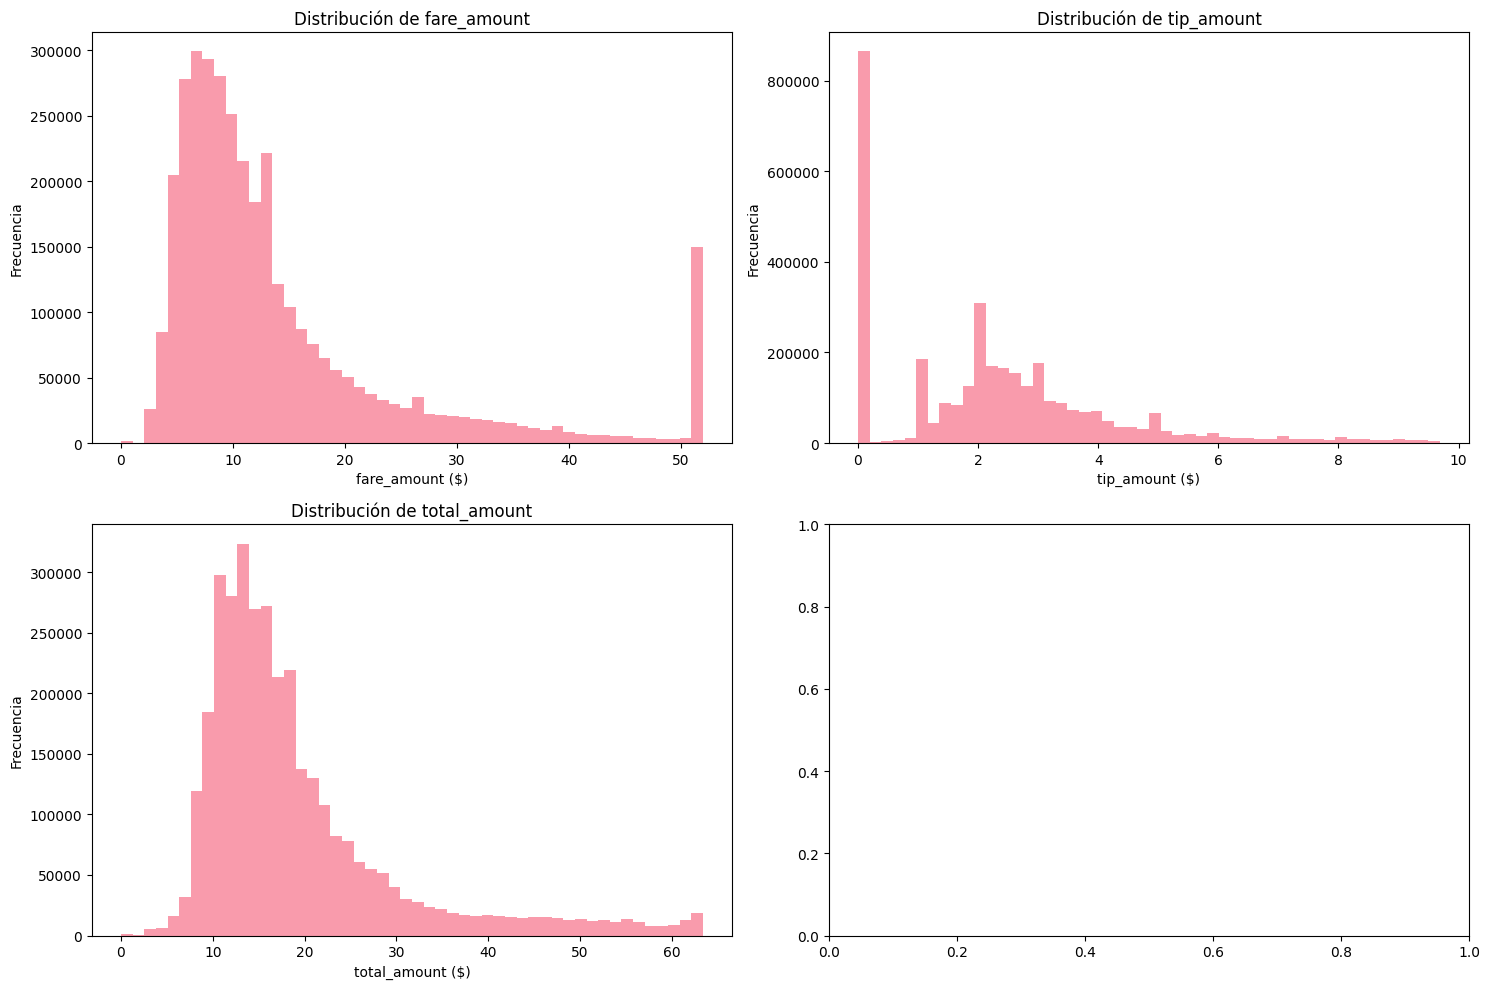


=== ANÁLISIS DE PROPINAS ===
Propina promedio: $2.82
Viajes sin propina: 857,270 (23.9%)
⚠️ Viajes con fare_amount = $0: 1,498 (0.04%)
Porcentaje de propina promedio (fare > $0): 21.58%
Porcentaje de propina mediano (fare > $0): 24.23%
Viajes con propina > $0 (fare > $0): 2,730,380 (76.6%)
Porcentaje de propina promedio (cuando se da propina): 28.19%
Porcentaje de propina promedio (fare > $0): 21.58%
Porcentaje de propina mediano (fare > $0): 24.23%
Viajes con propina > $0 (fare > $0): 2,730,380 (76.6%)
Porcentaje de propina promedio (cuando se da propina): 28.19%


In [9]:
# Visualizaciones de tarifas
available_fare_cols = [col for col in fare_cols if col in df.columns]
if available_fare_cols:
    # Filtrar algunas columnas principales para visualizar
    main_fare_cols = [col for col in available_fare_cols if any(x in col.lower() for x in ['total', 'fare_amount', 'tip'])][:4]
    
    if main_fare_cols:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()
        
        for i, col in enumerate(main_fare_cols):
            if i < 4:
                # Filtrar valores extremos para mejor visualización
                values_filtered = df[col][(df[col] >= 0) & (df[col] <= df[col].quantile(0.95))]
                axes[i].hist(values_filtered, bins=50, alpha=0.7)
                axes[i].set_title(f'Distribución de {col}')
                axes[i].set_xlabel(f'{col} ($)')
                axes[i].set_ylabel('Frecuencia')
        
        plt.tight_layout()
        plt.show()

# Análisis de propinas si existe columna de propinas
tip_cols = [col for col in df.columns if 'tip' in col.lower()]
if tip_cols and available_fare_cols:
    tip_col = tip_cols[0]
    fare_col = [col for col in available_fare_cols if 'fare' in col.lower()][0] if any('fare' in col.lower() for col in available_fare_cols) else available_fare_cols[0]
    
    print(f"\n=== ANÁLISIS DE PROPINAS ===")
    print(f"Propina promedio: ${df[tip_col].mean():.2f}")
    print(f"Viajes sin propina: {(df[tip_col] == 0).sum():,} ({(df[tip_col] == 0).mean()*100:.1f}%)")
    
    # Verificar viajes con fare_amount = 0 antes del cálculo
    zero_fare_trips = (df[fare_col] == 0).sum()
    if zero_fare_trips > 0:
        print(f"⚠️ Viajes con {fare_col} = $0: {zero_fare_trips:,} ({zero_fare_trips/len(df)*100:.2f}%)")
    
    # Calcular porcentaje de propina solo para viajes con fare_amount > 0
    valid_fare_mask = df[fare_col] > 0
    if valid_fare_mask.sum() > 0:
        df['tip_percentage'] = np.where(valid_fare_mask, 
                                       (df[tip_col] / df[fare_col]) * 100, 
                                       np.nan)
        
        # Estadísticas de porcentaje de propina (excluyendo fare_amount = 0)
        valid_tip_percentages = df.loc[valid_fare_mask, 'tip_percentage']
        print(f"Porcentaje de propina promedio (fare > $0): {valid_tip_percentages.mean():.2f}%")
        print(f"Porcentaje de propina mediano (fare > $0): {valid_tip_percentages.median():.2f}%")
        
        # Análisis adicional de propinas
        tip_given_mask = (df[tip_col] > 0) & valid_fare_mask
        if tip_given_mask.sum() > 0:
            tips_with_percentage = df.loc[tip_given_mask, 'tip_percentage']
            print(f"Viajes con propina > $0 (fare > $0): {tip_given_mask.sum():,} ({tip_given_mask.sum()/valid_fare_mask.sum()*100:.1f}%)")
            print(f"Porcentaje de propina promedio (cuando se da propina): {tips_with_percentage.mean():.2f}%")
    else:
        print("⚠️ No hay viajes con fare_amount > 0 para calcular porcentajes de propina")

## 6. Detección de Valores Atípicos (Outliers)

=== ANÁLISIS DE OUTLIERS ===
Columnas analizadas: ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'trip_duration_minutes']

=== TRIP_DISTANCE ===
Q1: 1.15, Q3: 3.73, IQR: 2.58
Límites IQR: [-2.72, 7.60]
Outliers por IQR: 455,943 (12.71%)
Viajes con distancia 0: 46,438 (1.29%)
Viajes > 100 millas: 155 (0.00%)

=== FARE_AMOUNT ===
Q1: 1.15, Q3: 3.73, IQR: 2.58
Límites IQR: [-2.72, 7.60]
Outliers por IQR: 455,943 (12.71%)
Viajes con distancia 0: 46,438 (1.29%)
Viajes > 100 millas: 155 (0.00%)

=== FARE_AMOUNT ===
Q1: 7.00, Q3: 17.00, IQR: 10.00
Límites IQR: [-8.00, 32.00]
Outliers por IQR: 371,211 (10.35%)
Tarifas negativas: 20,506 (0.57%)
Tarifas de $0: 1,498 (0.04%)
Tarifas > $200: 643 (0.02%)

=== TOTAL_AMOUNT ===
Q1: 7.00, Q3: 17.00, IQR: 10.00
Límites IQR: [-8.00, 32.00]
Outliers por IQR: 371,211 (10.35%)
Tarifas negativas: 20,506 (0.57%)
Tarifas de $0: 1,498 (0.04%)
Tarifas > $200: 643 (0.02%)

=== TOTAL_AMOUNT ===
Q1: 12.35, Q3: 23.76, IQR: 11.41
Límites IQR: [-4.77,

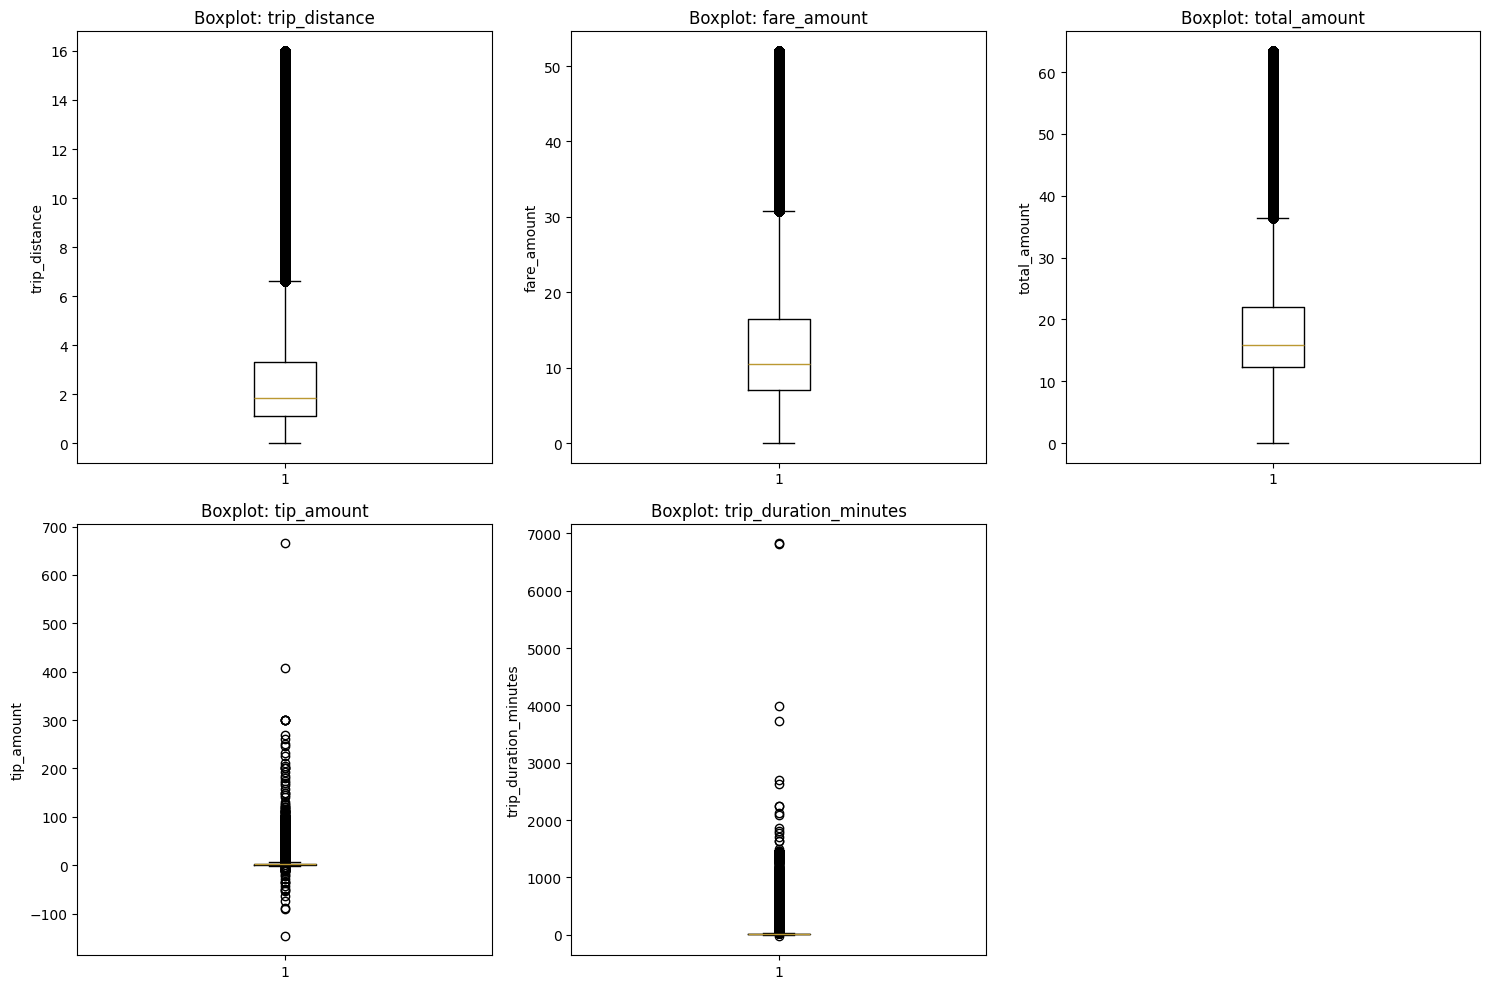

In [10]:
# Análisis de outliers en campos específicos según el diccionario de datos
key_cols = [
    'trip_distance',      # Distancia en millas
    'fare_amount',        # Tarifa base
    'total_amount',       # Monto total
    'tip_amount',         # Propinas
    'trip_duration_minutes'  # Duración calculada
]

# Filtrar solo las columnas que existen en el dataset
key_cols = [col for col in key_cols if col in df.columns]

print("=== ANÁLISIS DE OUTLIERS ===")
print(f"Columnas analizadas: {key_cols}")

if key_cols:
    # Análisis estadístico de outliers
    for col in key_cols:
        print(f"\n=== {col.upper()} ===")
        
        # Estadísticas básicas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"Límites IQR: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"Outliers por IQR: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
        
        # Análisis específico por campo
        if col == 'trip_distance':
            zero_distance = (df[col] == 0).sum()
            very_long = (df[col] > 100).sum()  # Más de 100 millas
            print(f"Viajes con distancia 0: {zero_distance:,} ({zero_distance/len(df)*100:.2f}%)")
            print(f"Viajes > 100 millas: {very_long:,} ({very_long/len(df)*100:.2f}%)")
            
        elif col == 'fare_amount':
            negative_fare = (df[col] < 0).sum()
            zero_fare = (df[col] == 0).sum()
            very_high = (df[col] > 200).sum()  # Más de $200
            print(f"Tarifas negativas: {negative_fare:,} ({negative_fare/len(df)*100:.2f}%)")
            print(f"Tarifas de $0: {zero_fare:,} ({zero_fare/len(df)*100:.2f}%)")
            print(f"Tarifas > $200: {very_high:,} ({very_high/len(df)*100:.2f}%)")
            
        elif col == 'total_amount':
            negative_total = (df[col] < 0).sum()
            zero_total = (df[col] == 0).sum()
            very_high = (df[col] > 300).sum()  # Más de $300
            print(f"Totales negativos: {negative_total:,} ({negative_total/len(df)*100:.2f}%)")
            print(f"Totales de $0: {zero_total:,} ({zero_total/len(df)*100:.2f}%)")
            print(f"Totales > $300: {very_high:,} ({very_high/len(df)*100:.2f}%)")
            
        elif col == 'tip_amount':
            # Las propinas solo deberían aparecer en pagos con tarjeta
            if 'payment_type' in df.columns:
                credit_card_trips = (df['payment_type'] == 1).sum()
                tips_on_credit = ((df['payment_type'] == 1) & (df[col] > 0)).sum()
                print(f"Viajes con tarjeta de crédito: {credit_card_trips:,}")
                print(f"Propinas en tarjeta: {tips_on_credit:,} ({tips_on_credit/credit_card_trips*100:.1f}% de viajes con tarjeta)")
                
            very_high_tip = (df[col] > 50).sum()  # Propinas > $50
            print(f"Propinas > $50: {very_high_tip:,} ({very_high_tip/len(df)*100:.2f}%)")
            
        elif col == 'trip_duration_minutes':
            negative_duration = (df[col] <= 0).sum()
            very_long = (df[col] > 180).sum()  # Más de 3 horas
            very_short = (df[col] < 1).sum()   # Menos de 1 minuto
            print(f"Duración ≤ 0 min: {negative_duration:,} ({negative_duration/len(df)*100:.2f}%)")
            print(f"Duración < 1 min: {very_short:,} ({very_short/len(df)*100:.2f}%)")
            print(f"Duración > 3 horas: {very_long:,} ({very_long/len(df)*100:.2f}%)")

    # Crear visualizaciones de boxplots
    n_cols = len(key_cols)
    if n_cols > 0:
        fig, axes = plt.subplots(2, (n_cols + 1) // 2, figsize=(15, 10))
        if n_cols == 1:
            axes = [axes]
        elif n_cols <= 2:
            axes = axes.ravel()
        else:
            axes = axes.ravel()
        
        for i, col in enumerate(key_cols):
            if i < len(axes):
                # Filtrar valores extremos para mejor visualización
                if col in ['trip_distance', 'fare_amount', 'total_amount']:
                    data_filtered = df[col][(df[col] >= 0) & (df[col] <= df[col].quantile(0.95))]
                else:
                    data_filtered = df[col].dropna()
                
                axes[i].boxplot(data_filtered)
                axes[i].set_title(f'Boxplot: {col}')
                axes[i].set_ylabel(col)
        
        # Ocultar subplots vacíos
        for i in range(len(key_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()

## 7. Matriz de Correlaciones

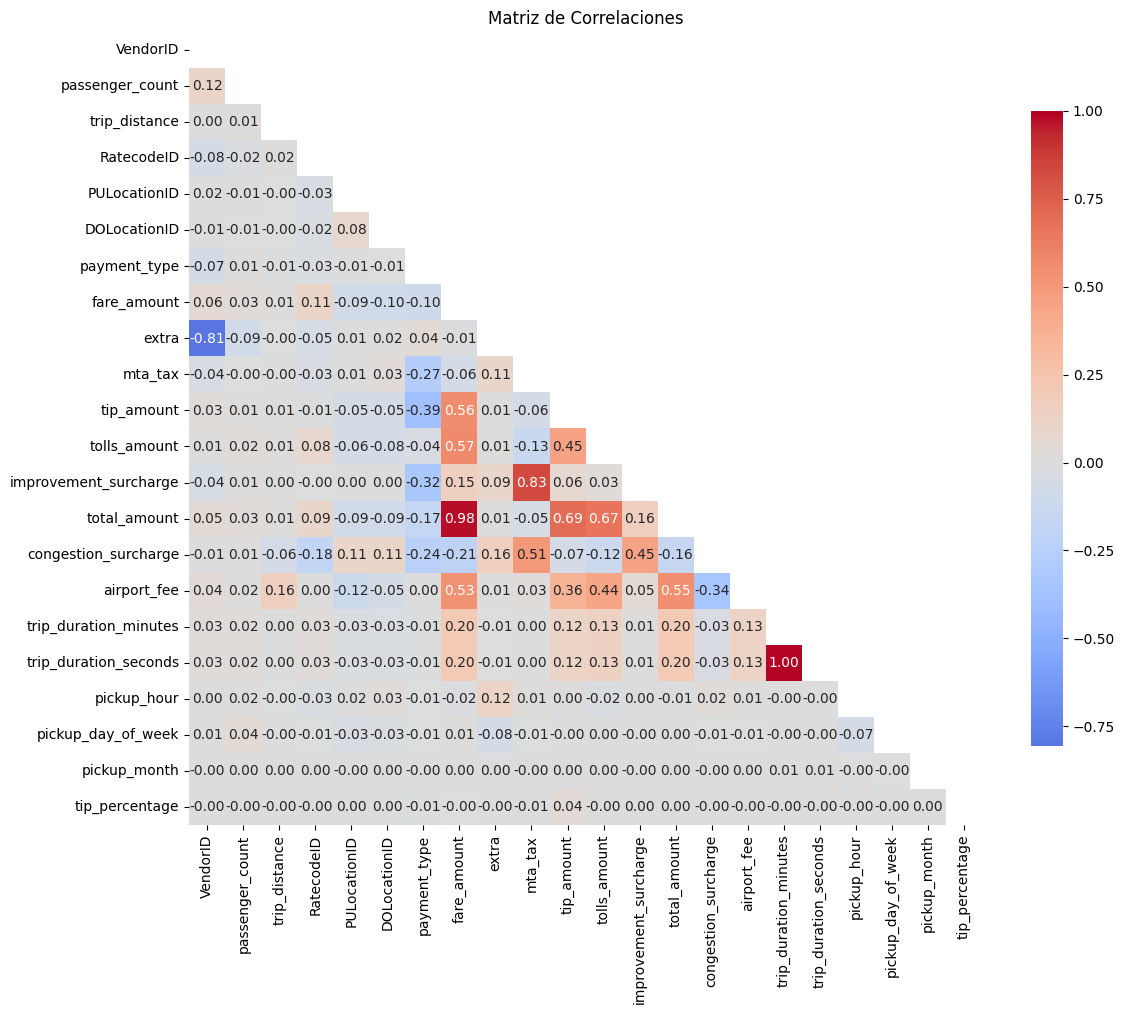

=== CORRELACIONES MÁS FUERTES ===
                Variable 1             Variable 2  Correlación  \
216  trip_duration_minutes  trip_duration_seconds     1.000000   
131            fare_amount           total_amount     0.978584   
155                mta_tax  improvement_surcharge     0.825877   
7                 VendorID                  extra    -0.806498   
167             tip_amount           total_amount     0.693463   
177           tolls_amount           total_amount     0.666645   
129            fare_amount           tolls_amount     0.574991   
128            fare_amount             tip_amount     0.562097   
196           total_amount            airport_fee     0.550632   
133            fare_amount            airport_fee     0.529971   

     Abs_Correlación  
216         1.000000  
131         0.978584  
155         0.825877  
7           0.806498  
167         0.693463  
177         0.666645  
129         0.574991  
128         0.562097  
196         0.550632  
133      

In [11]:
# Matriz de correlación para variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

# Crear heatmap de correlaciones
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()

# Mostrar correlaciones más altas (en valor absoluto)
print("=== CORRELACIONES MÁS FUERTES ===")
# Obtener triángulo superior de la matriz excluyendo la diagonal
correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if not np.isnan(corr_val):
            correlations.append({
                'Variable 1': corr_matrix.columns[i],
                'Variable 2': corr_matrix.columns[j],
                'Correlación': corr_val
            })

# Ordenar por valor absoluto de correlación
correlations_df = pd.DataFrame(correlations)
correlations_df['Abs_Correlación'] = abs(correlations_df['Correlación'])
correlations_df = correlations_df.sort_values('Abs_Correlación', ascending=False)

print(correlations_df.head(10))

## 8. Conclusiones del EDA

### Resumen de hallazgos principales:

**Estructura de los datos:**
- Dataset de **3,588,295 registros** con **19 columnas** (687.06 MB)
- **Falta 1 columna**: `cbd_congestion_fee` (nuevo recargo de congestión MTA)
- **129,524 registros (3.6%)** tienen valores faltantes en múltiples campos
- Tipos de datos apropiados con fechas como datetime64 y campos numéricos como float64/int64

**Distribución de proveedores (VendorID):**
- **Curb Mobility LLC (ID=2)**: 2,527,997 viajes (70.5%) - dominante
- **Creative Mobile Technologies LLC (ID=1)**: 1,054,130 viajes (29.4%)
- **Myle Technologies Inc (ID=6)**: 6,154 viajes (0.2%)
- **⚠️ VendorID=5 inválido**: 14 registros (no documentado en diccionario TLC)

**Patrones de uso y demanda:**
- **Tarifa estándar (RatecodeID=1)**: 90.8% de todos los viajes
- **Aeroportuario (JFK)**: 4.1% de viajes
- **Pagos con tarjeta de crédito**: 75.8% vs efectivo 19.7%
- **Flex Fare trips**: 3.6% del total (método emergente)
- **1 pasajero**: 73.7% de viajes; **2+ pasajeros**: 24.3%

**Análisis temporal crítico:**
- **Duración promedio**: 18.22 minutos (mediana: 12.70 min)
- **Problema de datos**: Rangos de fechas incorrectos (2003-2022, debería ser solo mayo 2022)
- **3,030 viajes (0.08%)** con duración negativa o cero
- **48,944 viajes (1.36%)** con duración < 1 minuto
- **5,084 viajes (0.14%)** con duración > 3 horas

**Análisis financiero - hallazgos clave:**
- **Tarifa promedio**: $15.17 (mediana: $10.50)
- **Monto total promedio**: $22.08 (mediana: $16.30)
- **Propina promedio**: $2.82 (21.58% sobre fare_amount)
- **⚠️ 28.01% de registros** tienen discrepancias en total_amount (diferencia promedio: $2.50)
- **96.2% de viajes con tarjeta** reciben propina vs **0% en efectivo** (correcto según regulaciones)

**Issues críticos de calidad de datos:**
1. **Valores negativos generalizados**:
   - 20,506 tarifas negativas (0.57%)
   - 20,709 totales negativos (0.58%)
   - 20,663 improvement_surcharge negativos (0.58%)
2. **Inconsistencias en cálculo de total_amount**: 1,005,162 registros (28.01%)
3. **Viajes con 0 pasajeros**: 73,587 registros (2.05%)
4. **Distancia 0**: 46,438 viajes (1.29%)
5. **Propinas anómalas**: 135 registros con propinas en pagos en efectivo

**Correlaciones significativas identificadas:**
- **fare_amount ↔ total_amount**: 0.98 (esperado, alta coherencia)
- **mta_tax ↔ improvement_surcharge**: 0.83 (patrones de aplicación regulatoria)
- **VendorID ↔ extra**: -0.81 (diferencias en políticas de recargos entre proveedores)
- **tip_amount ↔ total_amount**: 0.69 (propinas impactan monto final)

**Outliers por método IQR:**
- **trip_distance**: 12.71% outliers (455,943 registros)
- **fare_amount**: 10.35% outliers (371,211 registros)  
- **total_amount**: 11.98% outliers (430,012 registros)
- **tip_amount**: 7.99% outliers (286,603 registros)

**Preparación para modelado - recomendaciones:**
1. **Limpieza prioritaria**: 
   - Filtrar fechas fuera del rango mayo 2022
   - Corregir o remover valores negativos en campos monetarios
   - Validar VendorID=5 o reclasificar
2. **Feature engineering**:
   - Usar patrones temporales (hora, día de semana) 
   - Crear indicadores de anomalías (duración, distancia)
   - Calcular ratios: propina/tarifa, tarifa/distancia
3. **Segmentación de análisis**:
   - Separar viajes aeroportuarios vs ciudad
   - Analizar por proveedor (VendorID) 
   - Considerar método de pago para análisis de propinas
4. **Validación externa**: Verificar implementación de cbd_congestion_fee para datos más recientes